In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [13]:
X = pd.read_csv('data/bloomberg20240504.csv')
X.DATE = pd.to_datetime(X.DATE)
X.sort_values(by=['ID', 'DATE'], ascending=True, inplace=True)

In [14]:
X.loc[X.ID=="AMZN"].CLOSE

55952      6.316
55942      6.438
55923      6.139
55905      6.101
55900      5.942
          ...   
78       180.960
51       175.000
37       179.000
19       184.720
8        186.210
Name: CLOSE, Length: 3505, dtype: float64

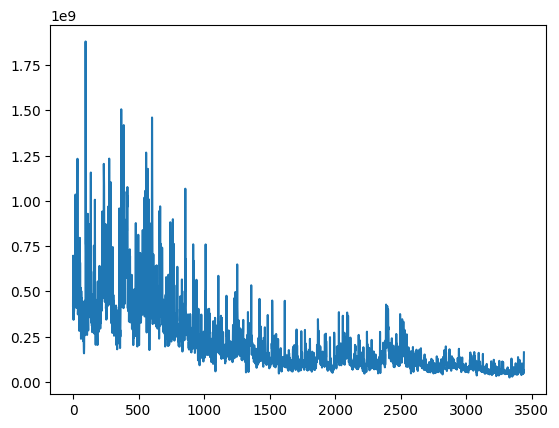

In [17]:
plt.plot(range(len(X.loc[X.ID=="AAPL"].VOLUME)),X.loc[X.ID=="AAPL"].VOLUME.values)

## Feature Engineering

- simple moving average
- exponentially weighted moving average
- logarthmic returns
- relative strength index

In [18]:
def create_sma(X:pd.DataFrame, N:int, variable:str, period:str='D') -> pd.DataFrame:
    X[f'{variable}_SMA_{N}{period}'] = X.groupby('ID')[f'{variable}'].transform(lambda x: x.rolling(window=N).mean().shift())
    return X

def ewma(X:pd.DataFrame, N:int, variable:str, period:str='D') -> pd.DataFrame:
    X[f'{variable}_EWMA_{N}{period}'] = X.groupby('ID')[f'{variable}'].transform(lambda x: x.ewm(span=N).mean().shift())
    return X

periods,freqs = [3,9,21,50,65,120,360], ['D']*7

for p, f in zip(periods,freqs):
    
    X = create_sma(X,p,'CLOSE',f)
    X = ewma(X,p,'CLOSE',f)

    X = create_sma(X,p,'VOLATILITY_90D',f)
    X = ewma(X,p,'VOLATILITY_90D',f)

X

,Unnamed: 0,DATE,ID,CLOSE,VOLUME,HIGH,VOLATILITY_90D,CLOSE_SMA_3D,CLOSE_EWMA_3D,VOLATILITY_90D_SMA_3D,...,VOLATILITY_90D_SMA_65D,VOLATILITY_90D_EWMA_65D,CLOSE_SMA_120D,CLOSE_EWMA_120D,VOLATILITY_90D_SMA_120D,VOLATILITY_90D_EWMA_120D,CLOSE_SMA_360D,CLOSE_EWMA_360D,VOLATILITY_90D_SMA_360D,VOLATILITY_90D_EWMA_360D
55023,51614,2010-08-31,AAPL,8.682,420786408,8.734,116.917,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55010,51599,2010-09-01,AAPL,8.940,697035220,8.981,116.117,NaN,8.682000,NaN,...,NaN,116.917000,NaN,8.682000,NaN,116.917000,NaN,8.682000,NaN,116.917000
54993,51584,2010-09-02,AAPL,9.006,415425192,9.006,115.003,NaN,8.854000,NaN,...,NaN,116.510846,NaN,8.812075,NaN,116.513667,NaN,8.811358,NaN,116.515889
54978,51569,2010-09-03,AAPL,9.242,520788268,9.242,113.779,8.876000,8.940857,116.012333,...,NaN,115.992688,NaN,8.877797,NaN,116.001695,NaN,8.876600,NaN,116.008788
54972,51554,2010-09-07,AAPL,9.208,342825252,9.269,112.786,9.062667,9.101467,114.966333,...,NaN,115.413465,NaN,8.971137,NaN,115.432053,NaN,8.968712,NaN,115.446687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,74,2024-04-29,XOM,119.640,17343755,120.050,17.892,120.113333,119.504947,17.402333,...,19.824754,19.596835,106.467750,109.981080,21.692525,21.051606,108.549472,104.919809,25.848339,25.311707
57,59,2024-04-30,XOM,118.270,21083294,120.200,17.751,119.643333,119.572474,17.632667,...,19.746323,19.545174,106.566583,110.140732,21.629375,20.999381,108.570472,105.001362,25.803506,25.270601
47,44,2024-05-01,XOM,116.030,27789759,118.470,18.099,118.623333,118.921237,17.838000,...,19.664754,19.490805,106.669917,110.275100,21.563642,20.945689,108.590750,105.074872,25.758358,25.228941
28,29,2024-05-02,XOM,116.240,25513648,117.260,18.099,117.980000,117.475618,17.914000,...,19.588877,19.448629,106.768417,110.370222,21.499675,20.898636,108.595889,105.135565,25.713969,25.189440


In [19]:
X.drop(columns=['Unnamed: 0'], inplace=True)

In [20]:
X

,DATE,ID,CLOSE,VOLUME,HIGH,VOLATILITY_90D,CLOSE_SMA_3D,CLOSE_EWMA_3D,VOLATILITY_90D_SMA_3D,VOLATILITY_90D_EWMA_3D,...,VOLATILITY_90D_SMA_65D,VOLATILITY_90D_EWMA_65D,CLOSE_SMA_120D,CLOSE_EWMA_120D,VOLATILITY_90D_SMA_120D,VOLATILITY_90D_EWMA_120D,CLOSE_SMA_360D,CLOSE_EWMA_360D,VOLATILITY_90D_SMA_360D,VOLATILITY_90D_EWMA_360D
55023,2010-08-31,AAPL,8.682,420786408,8.734,116.917,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55010,2010-09-01,AAPL,8.940,697035220,8.981,116.117,NaN,8.682000,NaN,116.917000,...,NaN,116.917000,NaN,8.682000,NaN,116.917000,NaN,8.682000,NaN,116.917000
54993,2010-09-02,AAPL,9.006,415425192,9.006,115.003,NaN,8.854000,NaN,116.383667,...,NaN,116.510846,NaN,8.812075,NaN,116.513667,NaN,8.811358,NaN,116.515889
54978,2010-09-03,AAPL,9.242,520788268,9.242,113.779,8.876000,8.940857,116.012333,115.594714,...,NaN,115.992688,NaN,8.877797,NaN,116.001695,NaN,8.876600,NaN,116.008788
54972,2010-09-07,AAPL,9.208,342825252,9.269,112.786,9.062667,9.101467,114.966333,114.626333,...,NaN,115.413465,NaN,8.971137,NaN,115.432053,NaN,8.968712,NaN,115.446687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65,2024-04-29,XOM,119.640,17343755,120.050,17.892,120.113333,119.504947,17.402333,17.592493,...,19.824754,19.596835,106.467750,109.981080,21.692525,21.051606,108.549472,104.919809,25.848339,25.311707
57,2024-04-30,XOM,118.270,21083294,120.200,17.751,119.643333,119.572474,17.632667,17.742247,...,19.746323,19.545174,106.566583,110.140732,21.629375,20.999381,108.570472,105.001362,25.803506,25.270601
47,2024-05-01,XOM,116.030,27789759,118.470,18.099,118.623333,118.921237,17.838000,17.746623,...,19.664754,19.490805,106.669917,110.275100,21.563642,20.945689,108.590750,105.074872,25.758358,25.228941
28,2024-05-02,XOM,116.240,25513648,117.260,18.099,117.980000,117.475618,17.914000,17.922812,...,19.588877,19.448629,106.768417,110.370222,21.499675,20.898636,108.595889,105.135565,25.713969,25.189440


In [18]:
X.sort_values(by='DATE',ascending=False,inplace=True)

In [22]:

X.columns.to_list()

['DATE',
 'ID',
 'CLOSE',
 'VOLUME',
 'HIGH',
 'VOLATILITY_90D',
 'CLOSE_SMA_3D',
 'CLOSE_EWMA_3D',
 'VOLATILITY_90D_SMA_3D',
 'VOLATILITY_90D_EWMA_3D',
 'CLOSE_SMA_9D',
 'CLOSE_EWMA_9D',
 'VOLATILITY_90D_SMA_9D',
 'VOLATILITY_90D_EWMA_9D',
 'CLOSE_SMA_21D',
 'CLOSE_EWMA_21D',
 'VOLATILITY_90D_SMA_21D',
 'VOLATILITY_90D_EWMA_21D',
 'CLOSE_SMA_50D',
 'CLOSE_EWMA_50D',
 'VOLATILITY_90D_SMA_50D',
 'VOLATILITY_90D_EWMA_50D',
 'CLOSE_SMA_65D',
 'CLOSE_EWMA_65D',
 'VOLATILITY_90D_SMA_65D',
 'VOLATILITY_90D_EWMA_65D',
 'CLOSE_SMA_120D',
 'CLOSE_EWMA_120D',
 'VOLATILITY_90D_SMA_120D',
 'VOLATILITY_90D_EWMA_120D',
 'CLOSE_SMA_360D',
 'CLOSE_EWMA_360D',
 'VOLATILITY_90D_SMA_360D',
 'VOLATILITY_90D_EWMA_360D']

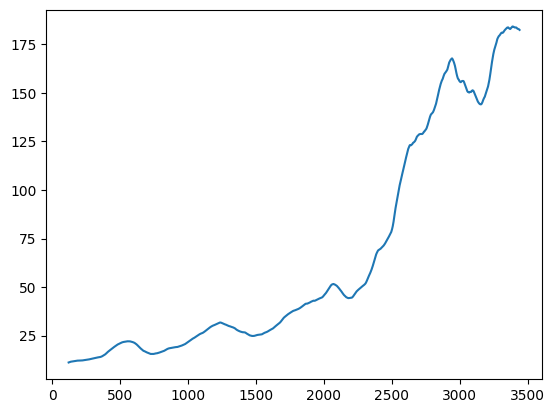

In [21]:
plt.plot(range(len(X.loc[X.ID=="AAPL"].CLOSE_SMA_120D)),X.loc[X.ID=="AAPL"].CLOSE_SMA_120D.values)

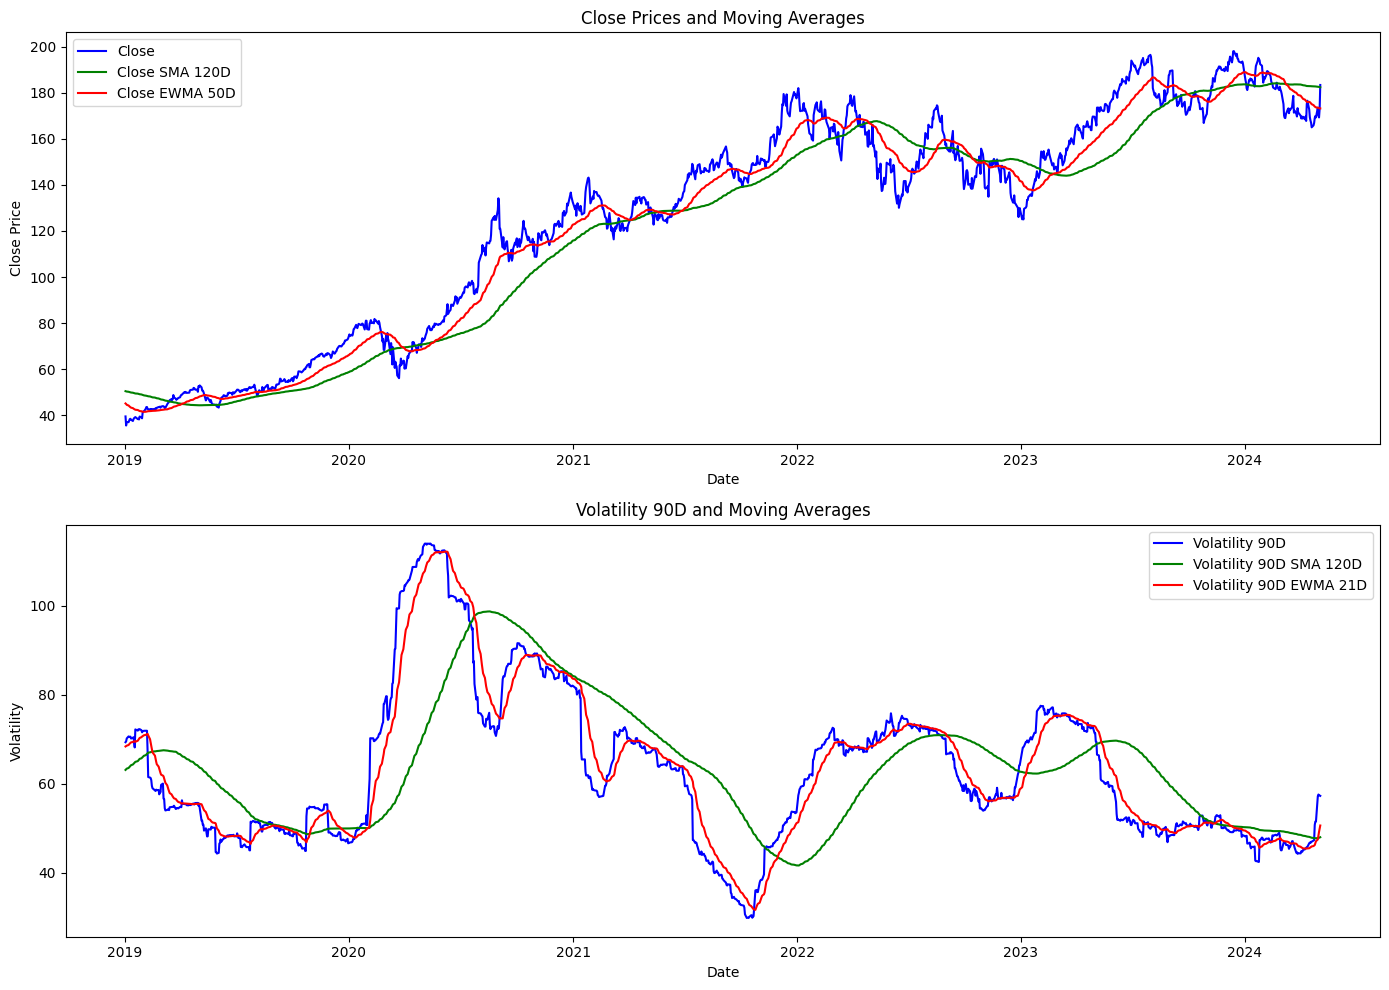

In [26]:
# Plotting
fig, ax = plt.subplots(2, 1, figsize=(14, 10))  # Creates 2 subplots

X = X.loc[X.ID=='AAPL'].loc[X.DATE > '2019-01-01']

# Subplot 1: Close prices and their moving averages
ax[0].plot(X['DATE'], X['CLOSE'], label='Close', color='blue')
ax[0].plot(X['DATE'], X['CLOSE_SMA_120D'], label='Close SMA 120D', color='green')
ax[0].plot(X['DATE'], X['CLOSE_EWMA_50D'], label='Close EWMA 50D', color='red')
ax[0].set_title('Close Prices and Moving Averages')
ax[0].set_xlabel('Date')
ax[0].set_ylabel('Close Price')
ax[0].legend()

# Subplot 2: Volatility and its moving averages
ax[1].plot(X['DATE'], X['VOLATILITY_90D'], label='Volatility 90D', color='blue')
ax[1].plot(X['DATE'], X['VOLATILITY_90D_SMA_120D'], label='Volatility 90D SMA 120D', color='green')
ax[1].plot(X['DATE'], X['VOLATILITY_90D_EWMA_21D'], label='Volatility 90D EWMA 21D', color='red')
ax[1].set_title('Volatility 90D and Moving Averages')
ax[1].set_xlabel('Date')
ax[1].set_ylabel('Volatility')
ax[1].legend()

# Show the plots
plt.tight_layout()  # Adjusts subplot params so that subplots fit into the figure area.
plt.show()
